In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import statistics
from scipy.optimize import curve_fit
from scipy import stats

data = pd.read_csv ("Allsupernovae.csv") #reading in supernovae data and creating data frame 'data'

cosmo = FlatLambdaCDM(H0=70, Om0=0.287) #H0 value from Betoule et al. 2014, omega_m best fit value from JLA sample, 
                                        #cosmological model assuming flat Universe

#Calculating luminosity distances for supernovae
data['d_L'] = cosmo.luminosity_distance(data.zcmb) #changing cmb redshift to distance in Mpc


#Distance modulus eq 
#mu = 5log(d_L/10pc) or bmag-absmag = mu = 5 log10(D_L) + 25 if D_L is in Mpc
data['mu'] = 5*(np.log10(data.d_L)) + 25

#best vals distance modulus
data['distance_modulus'] = data.mb - ((-19.10) - 0.117*data.X1 + 2.450*data.c)

In [4]:
#taking out null values from data frame
data = data[(data['logsSFR'].notnull()) & (data['logsSFR'] != -99) & (data['sSFR_lower'] != -99)] 

In [5]:
#residuals 
data['residuals'] = data.distance_modulus - data.mu
data['err'] = data.error_mb + (0.01 + ((0.117*data.error_X1) + (data.X1*0.006)) 
                          + ((2.450*data.error_c)+(data.c*0.075)))


data['uppersSFR'] = data.sSFR_upper
data['lowersSFR'] = data.sSFR_lower

#from Betoule et al. 2014 section 5
data['uppersSFR_err'] = np.where((data.logsSFR < -10.5) & (data.uppersSFR >= -10.5), 0.08**2, 0) #if moved from pass. to act.
data['lowersSFR_err'] = np.where((data.logsSFR > -10.5) & (data.lowersSFR <= -10.5), 0.08**2, 0) #if moved from act. to pass.


data['err_tot'] = data.err + data.uppersSFR_err + data.lowersSFR_err

In [6]:
#splitting the sample into passive/active galaxies (-10.5 is traditional cut in sSFR)
passive = data[(data.logsSFR <= -10.5)] 
residuals_passive = passive.distance_modulus - passive.mu
active = data[(data.logsSFR > -10.5)] 
residuals_active = active.distance_modulus - active.mu

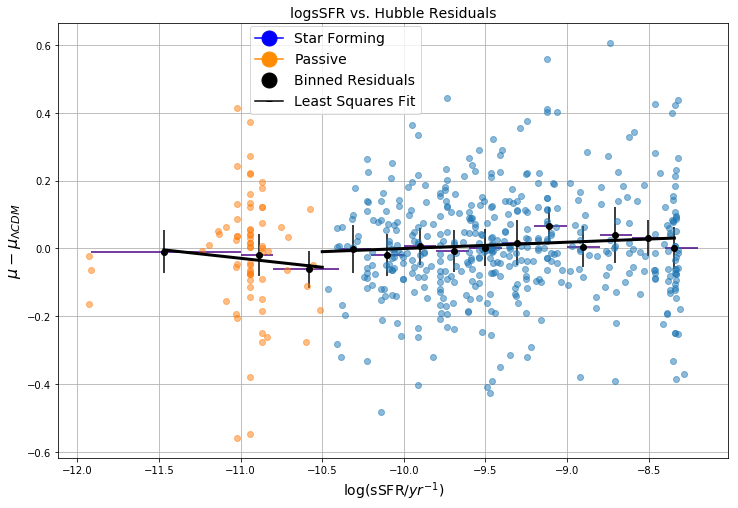

In [7]:
fig = plt.figure(figsize=(12,8))
plt.plot(active.logsSFR, residuals_active, 'o', alpha=0.5)
plt.plot(passive.logsSFR, residuals_passive, 'o', alpha=0.5)


#bins
bin_1 = data[(data.logsSFR >= -11.92) & (data.logsSFR < -11)] 
bin_2 = data[(data.logsSFR >= -11) & (data.logsSFR < -10.8)] 
bin_3 = data[(data.logsSFR >= -10.8) & (data.logsSFR < -10.4)] 
bin_4 = data[(data.logsSFR >= -10.4) & (data.logsSFR < -10.2)] 
bin_5 = data[(data.logsSFR >= -10.2) & (data.logsSFR < -10.0)] 
bin_6 = data[(data.logsSFR >= -10.0) & (data.logsSFR < -9.8)] 
bin_7 = data[(data.logsSFR >= -9.8) & (data.logsSFR < -9.6)] 
bin_8 = data[(data.logsSFR >= -9.6) & (data.logsSFR < -9.4)] 
bin_9 = data[(data.logsSFR >= -9.4) & (data.logsSFR < -9.2)] 
bin_10 = data[(data.logsSFR >= -9.2) & (data.logsSFR < -9.0)] 
bin_11 = data[(data.logsSFR >= -9.0) & (data.logsSFR < -8.8)] 
bin_12 = data[(data.logsSFR >= -8.8) & (data.logsSFR < -8.6)] 
bin_13 = data[(data.logsSFR >= -8.6) & (data.logsSFR < -8.4)] 
bin_14 = data[(data.logsSFR >= -8.4) & (data.logsSFR <= -8.2)] 

#finding the midpoint of each bin
midpoint_1 = (max(bin_1.logsSFR) + min(bin_1.logsSFR))/2
midpoint_2 = (max(bin_2.logsSFR) + min(bin_2.logsSFR))/2
midpoint_3 = (max(bin_3.logsSFR) + min(bin_3.logsSFR))/2
midpoint_4 = (max(bin_4.logsSFR) + min(bin_4.logsSFR))/2
midpoint_5 = (max(bin_5.logsSFR) + min(bin_5.logsSFR))/2
midpoint_6 = (max(bin_6.logsSFR) + min(bin_6.logsSFR))/2
midpoint_7 = (max(bin_7.logsSFR) + min(bin_7.logsSFR))/2
midpoint_8 = (max(bin_8.logsSFR) + min(bin_8.logsSFR))/2
midpoint_9 = (max(bin_9.logsSFR) + min(bin_9.logsSFR))/2
midpoint_10 = (max(bin_10.logsSFR) + min(bin_10.logsSFR))/2
midpoint_11 = (max(bin_11.logsSFR) + min(bin_11.logsSFR))/2
midpoint_12 = (max(bin_12.logsSFR) + min(bin_12.logsSFR))/2
midpoint_13 = (max(bin_13.logsSFR) + min(bin_13.logsSFR))/2
midpoint_14 = (max(bin_14.logsSFR) + min(bin_14.logsSFR))/2


midpoint = [midpoint_1, midpoint_2, midpoint_3, midpoint_4, midpoint_5, midpoint_6, midpoint_7, 
            midpoint_8, midpoint_9, midpoint_10, midpoint_11, midpoint_12, midpoint_13, midpoint_14] 

#finding the weight of each bin from the total error
weight_1 = 1/(np.abs(np.average(bin_1.err_tot)))
weight_2 = 1/(np.abs(np.average(bin_2.err_tot)))
weight_3 = 1/(np.abs(np.average(bin_3.err_tot)))
weight_4 = 1/(np.abs(np.average(bin_4.err_tot)))
weight_5 = 1/(np.abs(np.average(bin_5.err_tot)))
weight_6 = 1/(np.abs(np.average(bin_6.err_tot)))
weight_7 = 1/(np.abs(np.average(bin_7.err_tot)))
weight_8 = 1/(np.abs(np.average(bin_8.err_tot)))
weight_9 = 1/(np.abs(np.average(bin_9.err_tot)))
weight_10 = 1/(np.abs(np.average(bin_10.err_tot)))
weight_11 = 1/(np.abs(np.average(bin_11.err_tot)))
weight_12 = 1/(np.abs(np.average(bin_12.err_tot)))
weight_13 = 1/(np.abs(np.average(bin_13.err_tot)))
weight_14 = 1/(np.abs(np.average(bin_14.err_tot)))


weight = [weight_1, weight_2, weight_3, weight_4, weight_5, weight_6, weight_7, weight_8, weight_9, 
          weight_10, weight_11, weight_12, weight_13, weight_14]


#mean residuals
mean_1 = np.average(bin_1.residuals, weights = 1/bin_1.err_tot)
mean_2 = np.average(bin_2.residuals, weights = 1/bin_2.err_tot)
mean_3 = np.average(bin_3.residuals, weights = 1/bin_3.err_tot)
mean_4 = np.average(bin_4.residuals, weights = 1/bin_4.err_tot)
mean_5 = np.average(bin_5.residuals, weights = 1/bin_5.err_tot)
mean_6 = np.average(bin_6.residuals, weights = 1/bin_6.err_tot)
mean_7 = np.average(bin_7.residuals, weights = 1/bin_7.err_tot)
mean_8 = np.average(bin_8.residuals, weights = 1/bin_8.err_tot)
mean_9 = np.average(bin_9.residuals, weights = 1/bin_9.err_tot)
mean_10 = np.average(bin_10.residuals, weights = 1/bin_10.err_tot)
mean_11 = np.average(bin_11.residuals, weights = 1/bin_11.err_tot)
mean_12 = np.average(bin_12.residuals, weights = 1/bin_12.err_tot)
mean_13 = np.average(bin_13.residuals, weights = 1/bin_13.err_tot)
mean_14 = np.average(bin_14.residuals, weights = 1/bin_14.err_tot)


mean = [mean_1, mean_2, mean_3, mean_4, mean_5, mean_6, mean_7, mean_8, mean_9, mean_10, mean_11, mean_12, 
        mean_13, mean_14]

plt.plot(midpoint, mean, 'ko')

plt.title('logsSFR vs. Hubble Residuals', fontsize=14)
plt.xlabel(r'log(sSFR/$yr^{-1}$)', fontsize=14)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$', fontsize=16)
plt.grid(True)

#regression lines for active and passive 
slope_pass, intercept_pass, r_value_pass, p_value_pass, std_err_pass = stats.linregress(midpoint[0:3], mean[0:3])
slope_act, intercept_act, r_value_act, p_value_act, std_err_act = stats.linregress(midpoint[3:14], mean[3:14])

#value of each regression line at -10.5
pass_reg = (slope_pass*(-10.5)) + intercept_pass
act_reg = (slope_act*(-10.5)) + intercept_act

#difference between the active and passive regression lines at -10.5
step = pass_reg - act_reg

#for plotting midpoint against mean
pass_y = []
for i in range (0, 3, 1):
    t = slope_pass*midpoint[i] + intercept_pass
    pass_y.append((t))

act_y = []
for i in range (3, 14, 1):
    t = slope_act*midpoint[i] + intercept_act
    act_y.append((t))


plt.plot(midpoint[0:3] , pass_y, color='k', linewidth=3)
plt.plot(midpoint[3:14], act_y, color='k', linewidth=3)
plt.plot((midpoint[2], -10.5), (pass_y[2], slope_pass*-10.5 + intercept_pass), 'k', linewidth=3)
plt.plot((midpoint[3], -10.5), (act_y[0], slope_act*-10.5 + intercept_act), 'k', linewidth=3)


#error bars (x dir)
#right hand errors
err_1r = -11 - midpoint[0]
err_2r = -10.8 - midpoint[1]
err_3r = -10.4 - midpoint[2]
err_4r = -10.2 - midpoint[3]
err_5r = -10.0 - midpoint[4]
err_6r = -9.8 - midpoint[5]
err_7r = -9.6 - midpoint[6]
err_8r = -9.4  - midpoint[7]
err_9r = -9.2  - midpoint[8]
err_10r = -9.0  - midpoint[9]
err_11r = -8.8 - midpoint[10]
err_12r = -8.6 - midpoint[11]
err_13r = -8.4 - midpoint[12]
err_14r = -8.2 - midpoint[13]


err_right = [err_1r, err_2r, err_3r, err_4r, err_5r, err_6r, err_7r, err_8r, err_9r, err_10r, err_11r, err_12r, 
             err_13r, err_14r]

#left hand errors
err_1l = midpoint[0] - min(bin_1.logsSFR)  
err_2l = midpoint[1] - (-11) 
err_3l = midpoint[2] - (-10.8) 
err_4l = midpoint[3] - (-10.4)
err_5l = midpoint[4] - (-10.2) 
err_6l = midpoint[5] - (-10) 
err_7l = midpoint[6] - (-9.8)
err_8l = midpoint[7] - (-9.6) 
err_9l = midpoint[8] - (-9.4) 
err_10l = midpoint[9] - (-9.2)
err_11l = midpoint[10] - (-9.0) 
err_12l = midpoint[11] - (-8.8) 
err_13l = midpoint[12] - (-8.6) 
err_14l = midpoint[13] - (-8.4) 

err_left = [err_1l, err_2l, err_3l, err_4l, err_5l, err_6l, err_7l, err_8l, err_9l, err_10l, err_11l, err_12l, 
             err_13l, err_14l]

asym_errx = [err_left, err_right]
plt.errorbar(midpoint[0:14], mean[0:14], xerr=asym_errx, fmt='none', color='indigo', alpha=1)

#error bars (y dir)
erry1 = statistics.stdev(bin_1.err_tot)  
erry2 = statistics.stdev(bin_2.err_tot) 
erry3 = statistics.stdev(bin_3.err_tot) 
erry4 = statistics.stdev(bin_4.err_tot) 
erry5 = statistics.stdev(bin_5.err_tot) 
erry6 = statistics.stdev(bin_6.err_tot) 
erry7 = statistics.stdev(bin_7.err_tot) 
erry8 = statistics.stdev(bin_8.err_tot) 
erry9 = statistics.stdev(bin_9.err_tot) 
erry10 = statistics.stdev(bin_10.err_tot) 
erry11 = statistics.stdev(bin_11.err_tot) 
erry12 = statistics.stdev(bin_12.err_tot) 
erry13 = statistics.stdev(bin_13.err_tot) 
erry14 = statistics.stdev(bin_14.err_tot) 

erry = [erry1, erry2, erry3, erry4, erry5, erry6, erry7, erry8, erry9, erry10, erry11, erry12, 
             erry13, erry14]
plt.errorbar(midpoint[0:14], mean[0:14], yerr=erry, fmt='none', color='k', alpha=1)

#legend
blue_line = mlines.Line2D([], [], color='b', marker='o',markersize=15, label='Star Forming')
orange_line = mlines.Line2D([], [], color='darkorange', marker='o',markersize=15, label='Passive')
black_dots = mlines.Line2D([], [], color='k', marker='o', markersize=15,linestyle='none', label='Binned Residuals')
black_line = mlines.Line2D([], [], color='k', marker='_',linestyle='-', label='Least Squares Fit')
plt.legend(handles=[blue_line, orange_line, black_dots, black_line], fontsize=14, bbox_to_anchor=(0.275, 0.775))

plt.show()

fig.savefig('Delta sSFR Fit.pdf')
plt.close(fig)

In [8]:
step

-0.045900449713287356

In [9]:
#with single bin either side
bin_pass = data[(data.logsSFR <= -10.5)] 
bin_act = data[(data.logsSFR > -10.5)] 
 
midpoint_pass = (max(bin_pass.logsSFR) + min(bin_pass.logsSFR))/2
midpoint_act = (max(bin_act.logsSFR) + min(bin_act.logsSFR))/2

weight_pass = 1/(np.abs(np.average(bin_pass.err_tot)))
weight_act = 1/(np.abs(np.average(bin_act.err_tot)))

mean_pass = np.average(bin_pass.residuals, weights = 1/bin_pass.err_tot)
mean_act = np.average(bin_act.residuals, weights = 1/bin_act.err_tot)

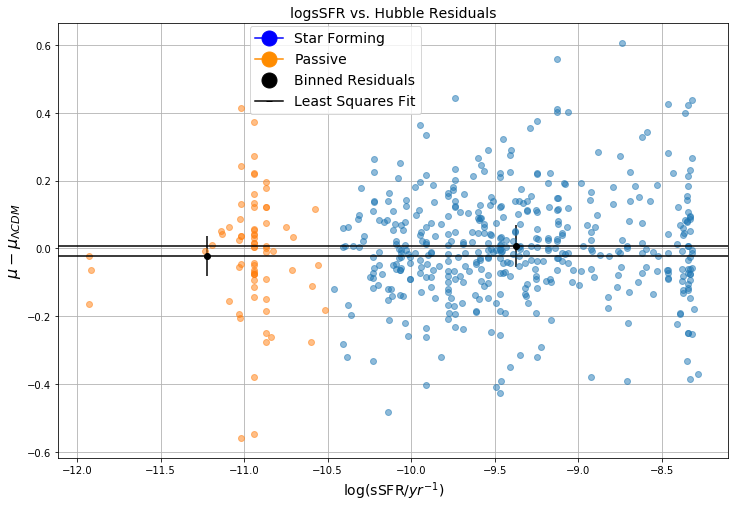

In [10]:
fig = plt.figure(figsize=(12,8))
plt.plot(active.logsSFR, residuals_active, 'o', alpha=0.5)
plt.plot(passive.logsSFR, residuals_passive, 'o', alpha=0.5)
plt.title('logsSFR vs. Hubble Residuals', fontsize=14)
plt.xlabel('log(sSFR/$yr^{-1})$', fontsize=14)
plt.ylabel(r'$\mu - \mu_{\Lambda CDM}$', fontsize=16)
plt.grid(True)

plt.plot(midpoint_act, mean_act, 'ko')
plt.plot(midpoint_pass, mean_pass, 'ko')

plt.axhline(mean_act, color='k')
plt.axhline(mean_pass, color='k')

#error bars (y dir)
pass_err = statistics.stdev(bin_pass.err_tot)
act_err = statistics.stdev(bin_act.err_tot)
plt.errorbar(midpoint_pass, mean_pass, yerr=pass_err, fmt='none', color='k', alpha=1)
plt.errorbar(midpoint_act, mean_act, yerr=act_err, fmt='none', color='k', alpha=1)

#legend
blue_line = mlines.Line2D([], [], color='b', marker='o',markersize=15, label='Star Forming')
orange_line = mlines.Line2D([], [], color='darkorange', marker='o',markersize=15, label='Passive')
black_dots = mlines.Line2D([], [], color='k', marker='o', markersize=15,linestyle='none', label='Binned Residuals')
black_line = mlines.Line2D([], [], color='k', marker='_',linestyle='-', label='Least Squares Fit')
plt.legend(handles=[blue_line, orange_line, black_dots, black_line], fontsize=14, bbox_to_anchor=(0.275, 0.775))

plt.show()
fig.savefig('Delta sSFR Mean Fit.pdf')
plt.close(fig)

In [11]:
#step size with only one bin for active and passive
mean_pass - mean_act

-0.030782628930543399

In [12]:
print(pass_err, act_err)

0.05999991408818373 0.061912322698621604
